# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [519]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [520]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [521]:
# Show total for each product category

print "Totals for each column:"
colSumDF = data.sum()
sortSum = colSumDF.sort_values()
display(sortSum)

# Create column with total amount spent by customer
indexDF = data.copy()
col_list = data.columns
indexDF['Total_Spent'] = indexDF[col_list].sum(axis=1)
indexDF.sort_values('Total_Spent', inplace=True)
print indexDF.head()


# Get sample number that is at the 25, 50 and 75 percentile for wide range of indices
myValues = [440*.25, 440*.5, 440*.75]

# Find names(indices) for my values
myIndices = []
for i in myValues:
    val = indexDF.iloc[int(i)]
    myIndices.append(val.name)
print '\nMy Indices:', myIndices

Totals for each column:


Delicatessen         670943
Detergents_Paper    1267857
Frozen              1351650
Milk                2550357
Grocery             3498562
Fresh               5280131
dtype: int64

     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  Total_Spent
154    622    55      137      75                 7             8          904
97     403   254      610     774                54            63         2158
98     503   112      778     895                56           132         2476
355    190   727     2012     245               184           127         3485
131   2101   589      314     346                70           310         3730

My Indices: [179, 387, 226]


In [522]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = myIndices

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)
display(data.describe())

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3157,4888,2500,4477,273,2165
1,20918,1916,1573,1960,231,961
2,20782,5921,9212,1759,2568,1553


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


[<matplotlib.text.Text at 0x1a68d320>, <matplotlib.text.Text at 0x27887f28>]

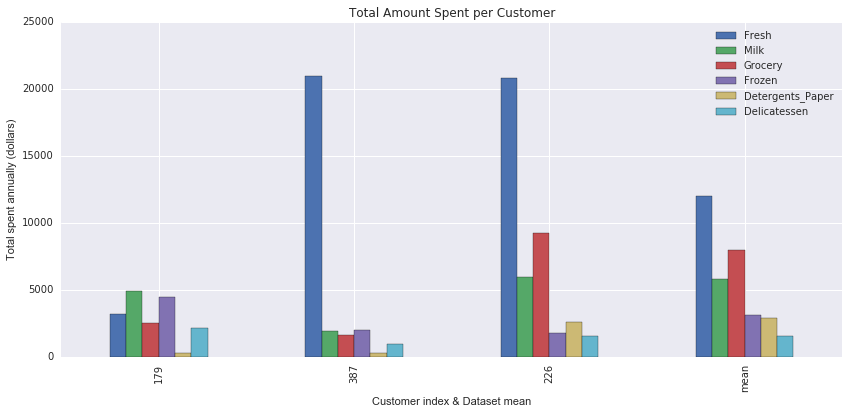

In [523]:
# Total amount spent per customer (by category), includes dataset mean
samples_bar = samples.append(data.describe().loc['mean'])
samples_bar.index = indices + ['mean']
_ = samples_bar.plot(kind='bar', figsize=(14,6),  title='Total Amount Spent per Customer')
_.set(xlabel="Customer index & Dataset mean", ylabel="Total spent annually (dollars)")

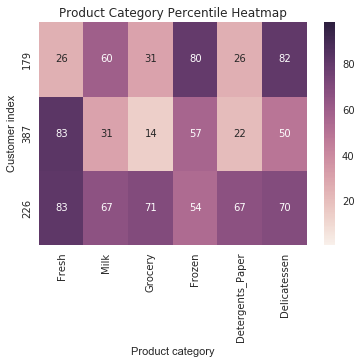

In [524]:
# Create heatmap of the category percentiles per sample
import seaborn as sns
# First, calculate the percentile ranks of the whole dataset.
percentiles = data.rank(pct=True)
# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)
# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]
# Now, create the heat map using the seaborn library
_ = sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)
_.set(xlabel="Product category", ylabel="Customer index", title='Product Category Percentile Heatmap')

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
My data points are approximately the 25%, 50% and 75% percentile points of the total amount spent across all product categories by each customer.
- 0 = Cafe or fast food
  - It has high milk spending, perhaps creamer for coffee (between the 50% and 75% of all the data). 
  - It also has high frozen and deli products ( both are above 75% percentile for their product categories) which would suggest food that can be quickly prepared (meats, sandwhiches, etc).
- 1 = Restaurant
  - It has very high fresh spending, suggesting fresh prepared food (above 75%)
  - Less frozen than sample 0, again because food is prepared from fresh materials (about 50%)
  - Lower deli than sample 0 suggests less lunch (sandwhiches) and quickly prepared items and perhaps more focus on fresh dinner meals (about 50%)
  - Detergents_paper are similar for samples 0 and 1, which are both much less than sample 2. I think this suggest use of paper products for the cafe/fast food and detergents for the retaurant (washing dishes).
- 2 = Retail
  - All categories are relatively high which points to a retail situation. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [525]:
# single
# Import libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.copy()
new_data.drop('Frozen', axis = 1, inplace=True)

# TODO: Split the data into training and testing sets using the given feature as the target
feature_cols = list(new_data.columns)
target_col = 'Frozen'

X_all = new_data[feature_cols]
y_all = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.25, random_state = 42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(max_features = 1, random_state = 42)
regressor.fit(X_train, y_train)

# reshape 
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)


# TODO: Report the score of the prediction using the testing set
scores = regressor.score(X_test, y_test)
print scores



-0.308935141289


In [526]:
print regressor.n_features_
print regressor.n_outputs_
print regressor.feature_importances_
print regressor.max_features_


5
1
[ 0.07414317  0.0579123   0.29526745  0.17850331  0.39417378]
1


In [527]:
# Original...keep
# Import libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.copy()

# TODO: Split the data into training and testing sets using the given feature as the target
all_features = list(data.columns)
s_dict = {}
for i in all_features:
    drop_feature = i
    feature_cols = list(all_features)
    feature_cols.remove(i)
    target_col = drop_feature

    X_all = new_data[feature_cols]
    y_all = new_data[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.25, random_state = 42)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state = 42)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    # reshape 
    X_train = np.asarray(X_train)
    X_test = np.asarray(X_test)
    y_pred = y_pred.reshape(len(y_pred),1)
    y_train = y_train.reshape(len(y_train),1)
    y_test = y_test.reshape(len(y_test),1)
    
    # print details
    if i == 'Grocery':
        print regressor.n_features_
        print regressor.n_outputs_
        print feature_cols
        print regressor.feature_importances_
        print regressor.max_features_
    
    # TODO: Report the score of the prediction using the testing set
    scores = regressor.score(X_test, y_test)
    s_dict[i] = round(scores,2)

print s_dict

5
1
['Fresh', 'Milk', 'Frozen', 'Detergents_Paper', 'Delicatessen']
[ 0.01693979  0.04599096  0.02078956  0.89107689  0.0252028 ]
5
{'Grocery': 0.68, 'Frozen': -0.21, 'Delicatessen': -2.25, 'Detergents_Paper': 0.27, 'Fresh': -0.39, 'Milk': 0.16}


In [528]:
xlist = [X_train, X_test, y_train, y_test, y_pred]
for a in xlist:
    print a.shape, type(a)

(330L, 5L) <type 'numpy.ndarray'>
(110L, 5L) <type 'numpy.ndarray'>
(330L, 1L) <type 'numpy.ndarray'>
(110L, 1L) <type 'numpy.ndarray'>
(110L, 1L) <type 'numpy.ndarray'>


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

Scores =  {'Feature withheld':Score}

{'Grocery': 0.68, 'Frozen': -0.21, 'Delicatessen': -2.25, 'Detergents_Paper': 0.27, 'Fresh': -0.39, 'Milk': 0.16}

- Question 1: The -2.25 score for the Deli category just says it failed to fit the data, correct? It does not mean that I have a code error somewhere? I question it because it is below -1.
- Question 2: Could I have used the regressor.fit_transform here somehow?


- Since I attempted to predict all of the features I am going to analyze this a little different. 
- Overall, the R^2 scores are very low. This indicates that the models, in all cases, fail to fit the data. Further, it means that the features do not contain much information about the target.
- Since we could not predict the withheld feature very accurately, this implies that all the features are relevant in identifying customers' spending habits.
- However, the Grocery category was the only one that had a relatively higher score. This suggests that the Grocery category provides us with less information, and is less relevant, when trying to indentify customers' spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

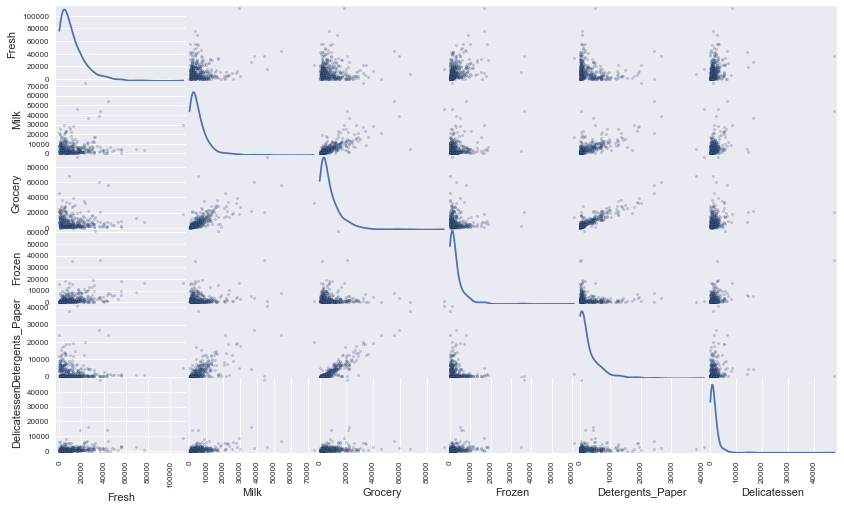

In [529]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
- The pair that show the most correlation is the Grocery and Detergents_Paper categories
- To a much less degree the Grocery and Milk categories show some correlation, as do the Detergents_Paper and Milk categories.
- This confirms my suspicions about the Grocery category holding less information when trying to identify a specific customer.
- The data is not normally distributed, it is right-skewed.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

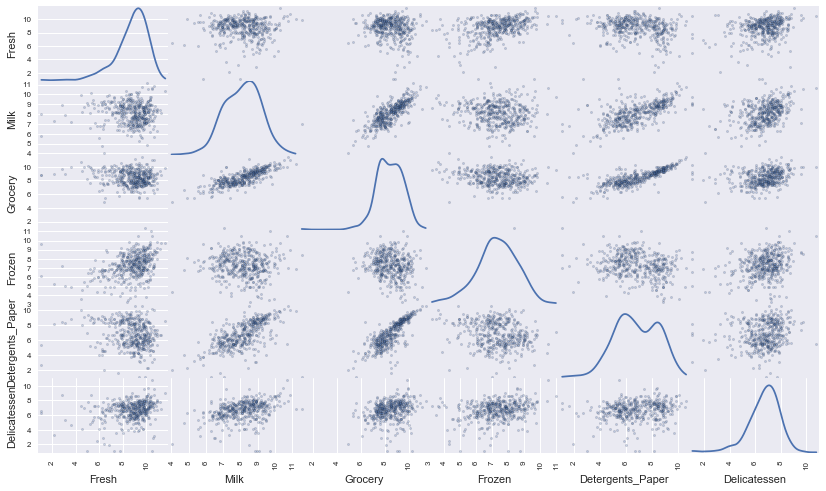

In [530]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data.copy())

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples.copy())

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [531]:
# Display the log-transformed sample data
display(samples)
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3157,4888,2500,4477,273,2165
1,20918,1916,1573,1960,231,961
2,20782,5921,9212,1759,2568,1553


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.057377,8.494539,7.824046,8.406708,5.609472,7.680176
1,9.948365,7.557995,7.360740,7.580700,5.442418,6.867974
2,9.941843,8.686261,9.128262,7.472501,7.850883,7.347944


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [532]:
for feature in log_data.keys():
    print feature
    
log_data.describe()

Fresh
Milk
Grocery
Frozen
Detergents_Paper
Delicatessen


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


In [533]:
# Create empty list for outliers
from collections import Counter
outliers = Counter()

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(feature_outliers)
    
    # Make list of outliers and dictionary of outlier counts
    tmpOutliers = list(feature_outliers.index.values)
    print 'Outliers: \n', tmpOutliers
    tmpCount = Counter(tmpOutliers)
    outliers = outliers + tmpCount
    print '\nOutlier counts: \n', outliers
    
# OPTIONAL: Select the indices for data points you wish to remove
print '\n\n########## Final Outlier Removal Information ##########'
print 'Total number of outliers:', len(outliers)
outliers = list(outliers.keys())

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Outliers: 
[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412]

Outlier counts: 
Counter({96: 1, 65: 1, 66: 1, 355: 1, 357: 1, 81: 1, 193: 1, 128: 1, 171: 1, 353: 1, 304: 1, 305: 1, 338: 1, 218: 1, 412: 1, 95: 1})
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Outliers: 
[86, 98, 154, 356]

Outlier counts: 
Counter({96: 1, 65: 1, 66: 1, 355: 1, 356: 1, 357: 1, 193: 1, 128: 1, 171: 1, 305: 1, 353: 1, 304: 1, 81: 1, 338: 1, 98: 1, 86: 1, 218: 1, 412: 1, 154: 1, 95: 1})
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Outliers: 
[75, 154]

Outlier counts: 
Counter({154: 2, 96: 1, 65: 1, 66: 1, 355: 1, 356: 1, 357: 1, 81: 1, 193: 1, 128: 1, 171: 1, 98: 1, 353: 1, 304: 1, 305: 1, 338: 1, 86: 1, 218: 1, 75: 1, 412: 1, 95: 1})
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Outliers: 
[38, 57, 65, 145, 175, 264, 325, 420, 429, 439]

Outlier counts: 
Counter({154: 2, 65: 2, 128: 1, 193: 1, 264: 1, 145: 1, 412: 1, 420: 1, 38: 1, 171: 1, 429: 1, 175: 1, 304: 1, 305: 1, 439: 1, 57: 1, 66: 1, 325: 1, 75: 1, 81: 1, 338: 1, 86: 1, 218: 1, 95: 1, 96: 1, 353: 1, 98: 1, 355: 1, 356: 1, 357: 1})
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Outliers: 
[75, 161]

Outlier counts: 
Counter({65: 2, 154: 2, 75: 2, 128: 1, 264: 1, 145: 1, 412: 1, 161: 1, 420: 1, 38: 1, 171: 1, 429: 1, 175: 1, 304: 1, 305: 1, 439: 1, 57: 1, 193: 1, 66: 1, 325: 1, 81: 1, 338: 1, 86: 1, 218: 1, 95: 1, 96: 1, 353: 1, 98: 1, 355: 1, 356: 1, 357: 1})
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Outliers: 
[66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]

Outlier counts: 
Counter({154: 3, 128: 2, 65: 2, 66: 2, 75: 2, 193: 1, 264: 1, 137: 1, 142: 1, 145: 1, 412: 1, 285: 1, 161: 1, 420: 1, 38: 1, 171: 1, 429: 1, 175: 1, 304: 1, 305: 1, 439: 1, 184: 1, 57: 1, 187: 1, 203: 1, 325: 1, 289: 1, 81: 1, 338: 1, 86: 1, 343: 1, 218: 1, 95: 1, 96: 1, 353: 1, 98: 1, 355: 1, 356: 1, 357: 1, 233: 1, 109: 1, 183: 1})


########## Final Outlier Removal Information ##########
Total number of outliers: 42


In [534]:
print 'Total number of outliers removed:', len(outliers)
outPercent = len(outliers)/float(len(log_data))*100
print 'Percent of data removed as outliers:{:4.1f}%'.format(round(outPercent, 1))
print 'Outliers removed:\n', outliers

Total number of outliers removed: 42
Percent of data removed as outliers: 9.5%
Outliers removed:
[128, 193, 264, 137, 142, 145, 154, 412, 285, 161, 420, 38, 171, 429, 175, 304, 305, 439, 184, 57, 187, 65, 66, 203, 325, 289, 75, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109, 183]


[<matplotlib.text.Text at 0x28f12940>, <matplotlib.text.Text at 0x28ef2fd0>]

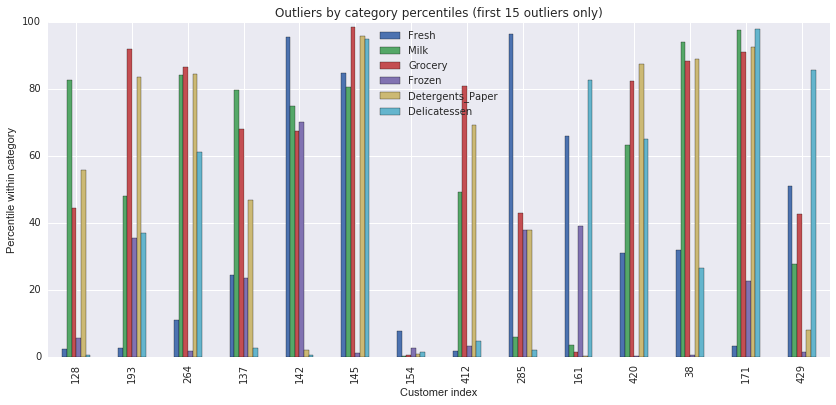

In [535]:
# See where each outlier falls within each category (percentile)
out_percentiles = data.rank(pct=True)
out_percentiles = 100*out_percentiles.round(decimals=3)
out_percentiles = out_percentiles.iloc[outliers[:14]]

# Create bar chart
out_bar = out_percentiles.plot(kind='bar', figsize=(14,6),  title='Outliers by category percentiles (first 15 outliers only)')
out_bar.set(xlabel="Customer index", ylabel="Percentile within category")


In [536]:
display(out_percentiles.head(15))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,2.3,82.5,44.3,5.5,55.7,0.6
193,2.7,48.0,91.8,35.5,83.4,37.0
264,11.1,84.1,86.6,1.8,84.5,61.1
137,24.5,79.8,68.0,23.4,46.8,2.7
142,95.5,74.8,67.5,70.0,1.9,0.6
145,84.8,80.5,98.4,1.1,95.9,94.8
154,7.7,0.2,0.5,2.5,0.9,1.4
412,1.8,49.3,80.9,3.2,69.3,4.8
285,96.4,5.9,42.8,37.7,37.7,1.9
161,65.9,3.6,1.4,39.1,0.3,82.5


In [537]:
# Compare variance for original data and outlier removed data

# Orig data transfrom
orig = pd.DataFrame(data.describe().loc['std'])
orig.columns = ['std.original']

# Outlier removed data transform
outlier_removed_data = data.drop(data.index[outliers]).reset_index(drop = True)
outlierdf = pd.DataFrame(outlier_removed_data.describe().loc['std'])
outlierdf.columns = ['std.outlier_removed']

# Combine dataframes
combinedDF = pd.concat([orig, outlierdf], axis=1)
combinedDF2 = combinedDF**2

combinedDF2.columns = ['var.original', 'var.outlier_removed']
combinedDF2['%Change'] = ((combinedDF2['var.outlier_removed'] - combinedDF2['var.original'])/combinedDF2['var.original'])*100
display(combinedDF2)


,var.original,var.outlier_removed,%Change
Fresh,1.599549e+08,1.575702e+08,-1.490854
Milk,5.446997e+07,4.109936e+07,-24.546753
Grocery,9.031010e+07,8.581806e+07,-4.974023
Frozen,2.356785e+07,1.378313e+07,-41.517250
Detergents_Paper,2.273244e+07,2.156695e+07,-5.126973
Delicatessen,7.952997e+06,3.050100e+06,-61.648418


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

- There are 5 points that are considered outliers for more than one feature. 
- These features should not be removed because they may provide enough information to create another segment. For example, if the outliers are consistently low in the same 2 features, this could indicate a new, or perhaps small segment that the supplier is providing service for.
- The data points added to the outliers list should be removed because these points are skewing the variance. For example, there is a 62% decrease in variance when we removed the outliers for the Deli category. Since PCA is looking to first choose the features with the most variance (to retain the most information) not removing them could create a significant difference in the PCA dimensions. Further, if the PCA dimensions were changed at all, this would also change how the clustering algorithm would group certain points.

My questions:
- The original reviewer recommended not removing the outliers because we would be removing approximately 10% of the data, which confuses me because this is what Sebastian said to do in the training videos (remove about 10%). Please explain further if possible, I have been re-thining the outliers for about 3 hours now, yikes! 
- In trying to determine which of the situations best matches our data from [this article](http://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/), recommended by the first reviewer, I did several things... 
  - Addressing the first situation in the article, I could have argued above that some of the outliers could have been incorrectly entered data. But how do we know for sure? In one example, it talks about a 19 lbs. person being incorrectly entered data. But how do we apply that here? A customer could probably just spend $3 in one category couldn't they? If we had more information we could probably figure this out. But that doesn't seem very scalable if we had 100s or 1,000s of features to look at individually. Which is why I think we have to trust the IQR*1.5 rule?
  - For the remaining 3 situations in the article, it seems that doing a coefficient of determination (r^2) for all the plots in the scatter plot would be the best option to see if there was any significant difference in the change of r^2 when the outliers were dropped.
    - If there was a difference we could look closer at them and see if situations 3 or 4 apply. However, this does not seem scalable and appears to be very time consuming. I know outliers are a very important to handle correctly, but in the context of this class this approach seems excessive and I feel I am missing a very important concept that could make this all less complex and easier to handle?
  - If there was no difference we could drop those outliers. Does this mean we need to look at all the outliers individually somehow? Or label their indices on the plots to know which to keep and remove?
- Any help is greatly appreciated.

UPDATE: I ran it 3 different ways
1. Removing no outliers
  - The silhouette_score suggested 3 clusters. Which is not accurate, 2 is the best option.
2. Removing all outliers
  - This performed the best by suggesting 2 clusters with the silhouette_score.
3. Removing outliers that occured only in 1 feature (those that occured in more than 1 feature were not removed)
  - The silhouette_score suggested 3 clusters here too. It also gave inverse weights to the second component (compared to removing all outliers).

This shows that my initial thoughts about keeping the data points considered outliers for more than one feature did not represent the data as well as I had originally thought. It was best to remove them all.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

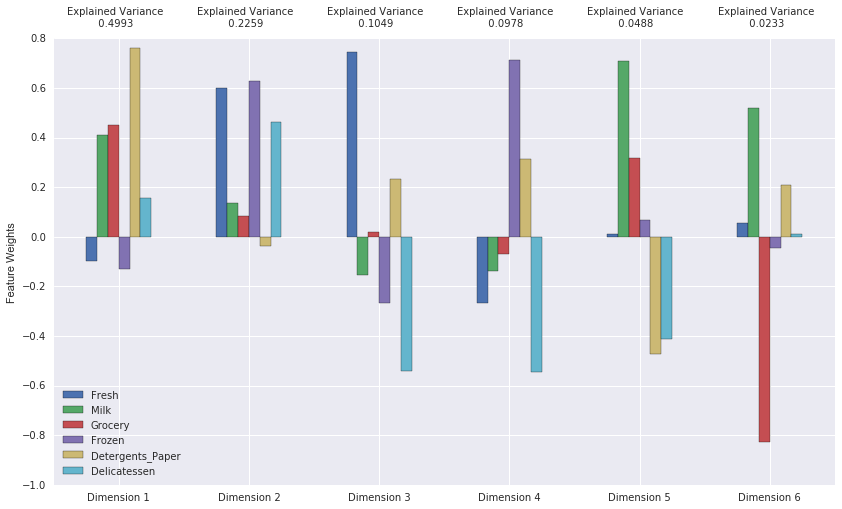

In [538]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

In [539]:
print pca_results['Explained Variance'].cumsum()

Dimension 1    0.4993
Dimension 2    0.7252
Dimension 3    0.8301
Dimension 4    0.9279
Dimension 5    0.9767
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
- 72.52% of the variance in the data is explained by the first and second principal components.
- 92.79% of the variance is explained by the first four principal components.
- The first dimension best represents customers that spend an increasing amount in Detergents_Paper also spend an increasing amount in Milk and Grocery.
- The second dimension represents that customers who spend more in Frozen also spend more in Fresh and Deli.
- The third dimension shows that customers who spend more in Fresh spend less in Deli
- The fourth dimension shows that those who spend more in Frozen spend less in Deli

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [540]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.9105,0.5416,-1.7368,0.0712,0.3266,0.3544
1,-1.8382,0.6195,0.4292,-0.4711,-0.1038,0.3517
2,1.3423,0.9843,0.6204,-0.3282,-0.0887,-0.0151


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [541]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [542]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.9105,0.5416
1,-1.8382,0.6195
2,1.3423,0.9843


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
- K-Means advantages
  - Fast, has less to compute than GMM
  - Is very scalable
  - Given enough time will converge (could be at local optima though)
- Gaussian Mixture Model advantages
  - soft assignment - gives probability that it belong to each group
- Given what we've seen with the wholesale customer data, I will use the Gaussian Mixture Model. A soft-clustering will be better for this data set because we have an idea of how the clusters could be defined in terms of customer segments. For example, retail, fast food, cafe, etc. However, there could be special cases where something could be considered a cafe or fast food. The soft clustering method of GMM will allow us to see these cases and perhaps treat them differently if necessary. Further, with a relatively small amount of data the GMM algorithm should not have run-time issues.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [543]:
# TODO: Apply your clustering algorithm of choice to the reduced data 

from sklearn.mixture import GMM
for components in range(2,16):    
    clusterer = GMM(n_components=components,random_state=42)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    from sklearn.metrics import silhouette_score
    score = silhouette_score(reduced_data, preds)
    print "'{}' clusters score:".format(components), score

'2' clusters score: 0.443601474015
'3' clusters score: 0.357294514249
'4' clusters score: 0.291646368377
'5' clusters score: 0.267990116649
'6' clusters score: 0.307122866447
'7' clusters score: 0.301835597658
'8' clusters score: 0.312615487024
'9' clusters score: 0.283717242517
'10' clusters score: 0.246720539489
'11' clusters score: 0.190964157253
'12' clusters score: 0.232825455006
'13' clusters score: 0.192988065364
'14' clusters score: 0.155371122531
'15' clusters score: 0.0717680951963


In [544]:
# Final with the best # of clusters

# TODO: Apply your clustering algorithm of choice to the reduced data 

from sklearn.mixture import GMM

# Enter number of components here
components = 2

clusterer = GMM(n_components=components,random_state=42)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_score
score = silhouette_score(reduced_data, preds)
print "'{}' clusters score:".format(components), score

'2' clusters score: 0.443601474015


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

'2' clusters score: 0.447157742293  ----> 2 clusters has the best silhouette score

'3' clusters score: 0.36398647984

'4' clusters score: 0.331150954285

'5' clusters score: 0.353193403287

'6' clusters score: 0.363712346094




### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

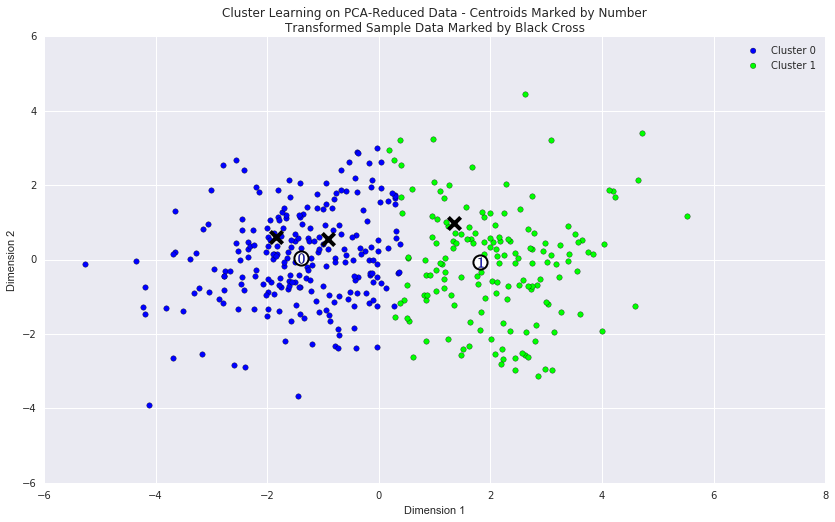

In [545]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [546]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(data.describe())
display(true_centers)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8967.0,1920.0,2437.0,2081.0,309.0,741.0
Segment 1,6079.0,7042.0,10241.0,1275.0,3546.0,1159.0


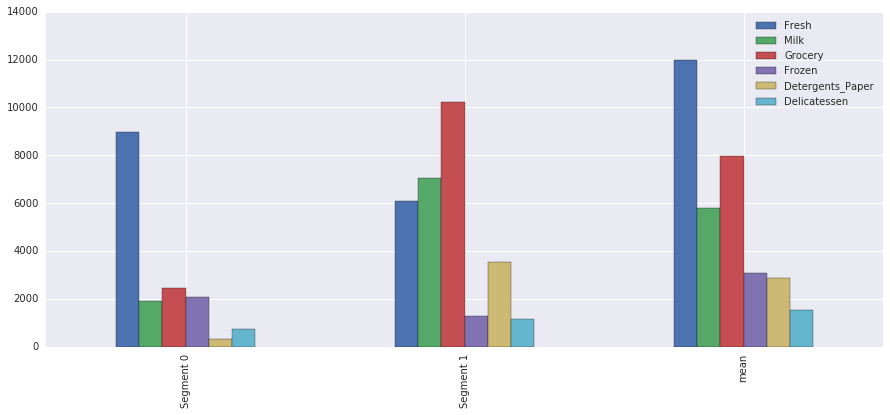

In [547]:
true_centers = true_centers.append(data.describe().loc['mean'])
_ = true_centers.plot(kind='bar', figsize=(15,6))

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

- Segment 0 = Hotel/Restaurant/Cafe. The mean of this segment is about in the first and second quartiles of the original data.
- Segment 1 = Retailers. The mean of the segment is in approximately the third quartile for all but fresh and frozen categories.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [548]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

# Display original sample data    
display(samples)
display(true_centers)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3157,4888,2500,4477,273,2165
1,20918,1916,1573,1960,231,961
2,20782,5921,9212,1759,2568,1553


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8967.000000,1920.000000,2437.000000,2081.000000,309.000000,741.000000
Segment 1,6079.000000,7042.000000,10241.000000,1275.000000,3546.000000,1159.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455


**Answer:**

- My original predictions were as follows:
  - 0 = Cafe or fast food
  - 1 = Restaurant
  - 2 = Retail
- By comparing the original sample data to the category means for each segment (information from question 8)...
  - Sample 0 is best represented by Segment 0
  - Sample 1 is best represented by Segment 0
  - Sample 2 is best represented by Segment 1
- The predictions for each sample point are consistent with my answer stated above and are consistent with my original predictions.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

The original results stated, "Initial testing did not discover any significant unsatisfactory results, so they implemented the cheaper option for all customers." However, this lead to unhappy customers and delivery cancellations. 

To determine if the new delivery option will still provide value for some of the customers we will do two more A/B tests, one for each customer segment. That is, for Segment 0 we would keep 80% of the customers with the original option of 5 days delivery (test A in our A/B test). Test B would have the remaining 20% of the customers in Segment 0 do the 3 day delivery option. This would be repeated for Segment 1's customers as well. 

The test would run for 1-2 weeks. At the end of the test we would see which segment, or perhaps both or neither, had a positive reaction to the new 3 day delivery. Based on those results they could make the delivery change to the appropriate segment(s), if applicable.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

For the wholesale distributor we would use a classification supervised learner, such as SVM, ensemble, or k nearest neighbors. We would use the existing customer data to train the classifier, with the newly created customer segment feature being the target variable.


My questions:

Thinking a little further about actually doing the supervised classification...
- Is it safe to assume linear separability from the PCA-reduced plot we created before? If we perform PCA on the data again but with the new labels will we get the same dimensions? It seems we are now asking which components are more important in classifying the points into specific segments versus just seeing which components gave the most information to build clusters. Or is this the same thing?
- Further, with the information we already have can we make any safe shortcuts in creating the supervised learner? Or do we have go through all the steps? 


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

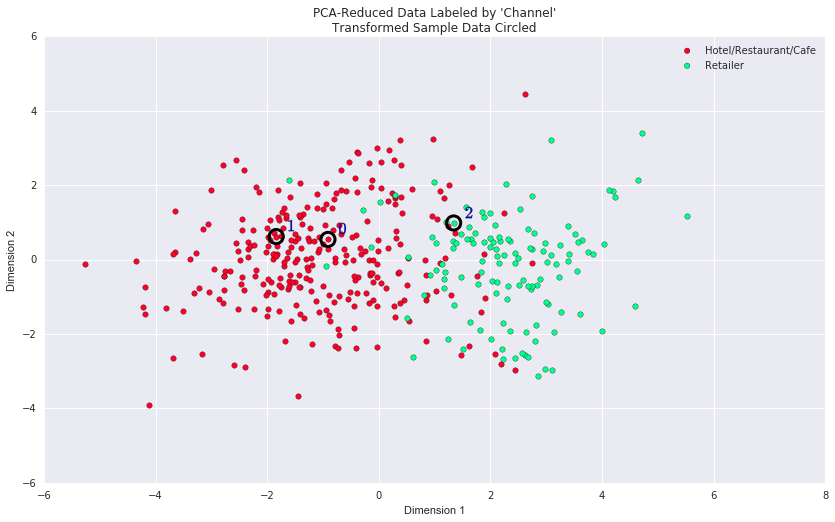

In [549]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

- The clustering algorithm represents the data pretty well. It does however have quite a few mis-labeled points in the middle.
  - However, the 3 sample data points chosen were accurately represented with our clustering algorithm.
- The number of clusters we chose (2 clusters) was representative of the real data since there are 2 channels.
- There are not any customer segments that can be classified as purely 'retailers' or 'hotels/restaurants/cafe'
- Yes I would consider these classifications consistent with my previous definition of the customer segments (I read ahead and chose them based on the later information. However, they were still consitent with my predictions of what I thought the original samples were.)
  - My original predictions were as follows:
    - 0 = Cafe or fast food (predicted by algorithm as hotels/restaurants/cafe)
    - 1 = Restaurant (predicted by algorithm as hotels/restaurants/cafe)
    - 2 = Retail (predicted by algorithm as retailer)


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.